In [3]:
!pip3 install selenium webdriver_manager

  Using cached selenium-4.3.0-py3-none-any.whl (981 kB)
  Using cached trio-0.21.0-py3-none-any.whl (358 kB)
  Using cached trio_websocket-0.9.2-py3-none-any.whl (16 kB)
  Using cached python_dotenv-0.20.0-py3-none-any.whl (17 kB)
  Using cached sortedcontainers-2.4.0-py2.py3-none-any.whl (29 kB)
  Using cached outcome-1.2.0-py2.py3-none-any.whl (9.7 kB)
  Using cached async_generator-1.10-py3-none-any.whl (18 kB)
  Using cached wsproto-1.1.0-py3-none-any.whl (24 kB)
  Using cached PySocks-1.7.1-py3-none-any.whl (16 kB)
  Using cached pyOpenSSL-22.0.0-py2.py3-none-any.whl (55 kB)
  Using cached cryptography-37.0.4-cp36-abi3-win_amd64.whl (2.4 MB)
  Using cached h11-0.13.0-py3-none-any.whl (58 kB)


In [4]:
import pandas as pd
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager

In [5]:
driver = webdriver.Chrome(ChromeDriverManager().install())

[WDM] - Downloading: 100%|████████████████████████████| 6.13M/6.13M [00:03<00:00, 2.13MB/s]
C:\Users\Izzham\AppData\Local\Temp\ipykernel_12188\1503906442.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


In [6]:
page_url = "https://witcher.fandom.com/wiki/Category:Characters_in_the_stories"
driver.get(page_url)

In [7]:
# book_categories = driver.find_elements_by_class_name('category-page__member-link')
# old code -> change to new code which is :
book_categories = driver.find_elements(By.CLASS_NAME,'category-page__member-link')

In [8]:
book_categories[0].text

'Category:Baptism of Fire characters'

In [9]:
book_categories[0].get_attribute('href')

'https://witcher.fandom.com/wiki/Category:Baptism_of_Fire_characters'

In [10]:
character_elem = driver.find_elements(By.CLASS_NAME,'category-page__member-link')

In [11]:
character_elem[0].text

'Category:Baptism of Fire characters'

# FULL CODE

In [12]:
# Create driver
driver = webdriver.Chrome(ChromeDriverManager().install())

# Go to character in book page
page_url = "https://witcher.fandom.com/wiki/Category:Characters_in_the_stories"
driver.get(page_url)


#Click on Accept Cookies
# time.sleep(3)
# driver.find_element(By.XPATH,'//div[text()="ACCEPT"]').click()

# find books
book_categories = driver.find_elements(By.CLASS_NAME,'category-page__member-link')

books = []
for category in book_categories:
    book_url = category.get_attribute('href')
    book_name = category.text
    books.append({"book_name":book_name,"url":book_url})

C:\Users\Izzham\AppData\Local\Temp\ipykernel_12188\3470357311.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


In [13]:
books

[{'book_name': 'Category:Baptism of Fire characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Baptism_of_Fire_characters'},
 {'book_name': 'Category:Blood of Elves characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Blood_of_Elves_characters'},
 {'book_name': "Godamba Thaess'en",
  'url': 'https://witcher.fandom.com/wiki/Godamba_Thaess%27en'},
 {'book_name': 'Category:Season of Storms characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Season_of_Storms_characters'},
 {'book_name': 'Category:Something Ends, Something Begins characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Something_Ends,_Something_Begins_characters'},
 {'book_name': 'Category:Sword of Destiny characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Sword_of_Destiny_characters'},
 {'book_name': 'Category:Szpony i kły characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Szpony_i_k%C5%82y_characters'},
 {'book_name': 'Category:Tales from the world of The W

In [14]:
character_list = []

for book in books:
    #go to book page
    driver.get(book['url'])
    
    character_elem = driver.find_elements(By.CLASS_NAME,'category-page__member-link')
    
    for elem in character_elem:
        character_list.append({'book':book['book_name'], 'name':elem.text})

In [15]:
character_list

[{'book': 'Category:Baptism of Fire characters', 'name': 'Adalia'},
 {'book': 'Category:Baptism of Fire characters', 'name': 'Adela'},
 {'book': 'Category:Baptism of Fire characters', 'name': 'Aen Saevherne'},
 {'book': 'Category:Baptism of Fire characters', 'name': 'Aevenien'},
 {'book': 'Category:Baptism of Fire characters', 'name': 'Aglaïs'},
 {'book': 'Category:Baptism of Fire characters', 'name': 'Albrich'},
 {'book': 'Category:Baptism of Fire characters', 'name': 'Amavet'},
 {'book': 'Category:Baptism of Fire characters', 'name': 'Angus Bri Cri'},
 {'book': 'Category:Baptism of Fire characters', 'name': 'Anna Kameny'},
 {'book': 'Category:Baptism of Fire characters', 'name': 'Anzelm Aubry'},
 {'book': 'Category:Baptism of Fire characters', 'name': 'Artaud Terranova'},
 {'book': 'Category:Baptism of Fire characters', 'name': 'Asse'},
 {'book': 'Category:Baptism of Fire characters', 'name': 'Assire var Anahid'},
 {'book': 'Category:Baptism of Fire characters', 'name': 'Aubry (first

In [21]:
df = pd.DataFrame(character_list)
df

,book,name
0,Category:Baptism of Fire characters,Adalia
1,Category:Baptism of Fire characters,Adela
2,Category:Baptism of Fire characters,Aen Saevherne
3,Category:Baptism of Fire characters,Aevenien
4,Category:Baptism of Fire characters,Aglaïs
...,...,...
1270,Category:Time of Contempt characters,Yanna of Murivel
1271,Category:Time of Contempt characters,Yarpen Zigrin
1272,Category:Time of Contempt characters,Yennefer of Vengerberg
1273,Category:Time of Contempt characters,Yiolenta Suarez


In [22]:
df.to_csv('character.csv')

In [17]:
!pip3 install matplotlib

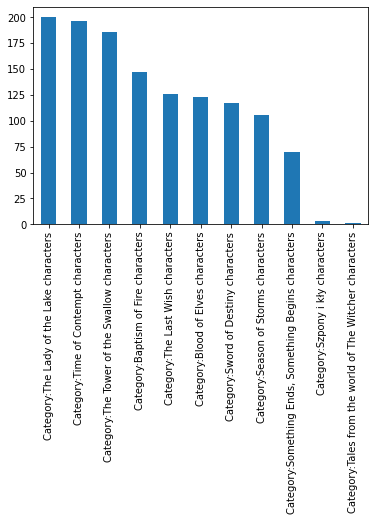

In [18]:
import matplotlib.pyplot as plt

character_df = pd.DataFrame(character_list)

character_df['book'].value_counts().plot(kind="bar")
plt.show()